99887.41086967538 309.91503437723776
100135.74439877884 222.108162962709
99943.87176913187 326.6876404412977
98126.11042388123 4783.130289806912
100035.03539106864 216.88172433799704
100003.91468501976 424.7065718880043


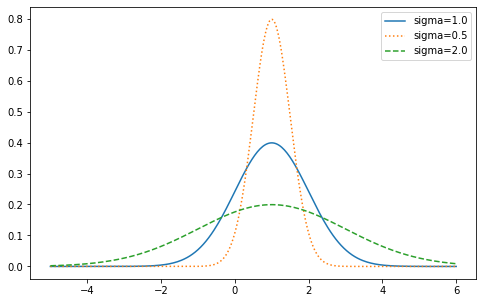

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def gaussian(x, u, sigma):
    return math.exp(-(x - u) ** 2 / (2 * sigma * sigma)) / math.sqrt(2 * math.pi * sigma * sigma)

def importance_sampling_test(ori_sigma, sample_sigma):
    origin = []
    for n in range(10):
        sum = 0
        for i in range(100000):
            a = np.random.normal(1.0, ori_sigma)
            sum += a
        origin.append(sum)

    isample = []
    for n in range(10):
        sum2 = 0
        for i in range(100000):
            a= np.random.normal(1.0, sample_sigma)
            ua = gaussian(a, 1.0, sample_sigma)
            na = gaussian(a, 1.0, ori_sigma)
            sum2 += a * na / ua
        isample.append(sum2)

    origin = np.array(origin)
    isample = np.array(isample)
    print(np.mean(origin), np.std(origin))
    print(np.mean(isample), np.std(isample))

importance_sampling_test(1.0, 1.0)
importance_sampling_test(1.0, 0.5)
importance_sampling_test(1.0, 2)

xs = np.linspace(-5, 6, 301)
y1 = [gaussian(x, 1.0, 1.0) for x in xs]
y2 = [gaussian(x, 1.0, 0.5) for x in xs]
y3 = [gaussian(x, 1.0, 2) for x in xs]

fig = plt.figure(figsize=(8,5))
plt.plot(xs, y1, label='sigma=1.0')
plt.plot(xs, y2, label='sigma=0.5', linestyle=':')
plt.plot(xs, y3, label='sigma=2.0', linestyle='--')
plt.legend()
plt.show()